# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
#lat_range = (-90, 90)
#lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?appid="+api_key+"&units=imperial&q="

df = pd.DataFrame(cities, columns=["city"])

df["lat"] = ""
df["lng"] = ""
df["maxtemp"] = ""
df["cloudiness"] = ""
df["country"] = ""
df["date"] = ""
df["humidity"] = ""
df["windspeed"] = ""

print("Beginning Data Retrieval\n-------------------------")

for index, row in df.iterrows():
    print("Processing record "+str(index)+" | "+row["city"])
    response = requests.get(url + row["city"]).json()
    
    try:
        df.loc[index, 'lat'] = response['coord']['lat']
        df.loc[index, 'lng'] = response['coord']['lon']
        df.loc[index, 'maxtemp'] = response['main']['temp_max']
        df.loc[index, 'cloudiness'] = response['clouds']["all"]
        df.loc[index, 'country'] = response['sys']['country']
        df.loc[index, 'date'] = response['dt']
        df.loc[index, 'humidity'] = response['main']["humidity"]
        df.loc[index, 'windspeed'] = response['wind']["speed"]
    except:
        print("City not found. Skipping...")

df

Beginning Data Retrieval
-------------------------
Processing record 0 | kirakira
Processing record 1 | tasiilaq
Processing record 2 | kavaratti
Processing record 3 | cape town
Processing record 4 | noormarkku
Processing record 5 | lieksa
Processing record 6 | dobryanka
Processing record 7 | hobart
Processing record 8 | rikitea
Processing record 9 | bayir
Processing record 10 | taolanaro
City not found. Skipping...
Processing record 11 | castro
Processing record 12 | belushya guba
City not found. Skipping...
Processing record 13 | qaanaaq
Processing record 14 | guerrero negro
Processing record 15 | duvan
Processing record 16 | san patricio
Processing record 17 | albany
Processing record 18 | cayenne
Processing record 19 | nanortalik
Processing record 20 | hasaki
Processing record 21 | punta arenas
Processing record 22 | esperance
Processing record 23 | new norfolk
Processing record 24 | kloulklubed
Processing record 25 | dawei
Processing record 26 | saskylakh
Processing record 27 | mat

Processing record 229 | bauchi
Processing record 230 | payo
Processing record 231 | saint george
Processing record 232 | port elizabeth
Processing record 233 | yamada
Processing record 234 | leningradskiy
Processing record 235 | lafia
Processing record 236 | suntar
Processing record 237 | pipili
Processing record 238 | shingu
Processing record 239 | mubi
Processing record 240 | lebu
Processing record 241 | spasskoye
Processing record 242 | sentyabrskiy
City not found. Skipping...
Processing record 243 | ruatoria
City not found. Skipping...
Processing record 244 | santa fe
Processing record 245 | tura
Processing record 246 | newport
Processing record 247 | katsuura
Processing record 248 | darhan
Processing record 249 | paamiut
Processing record 250 | amapa
Processing record 251 | torbay
Processing record 252 | puerto ayora
Processing record 253 | ribeira grande
Processing record 254 | caconda
Processing record 255 | timizart
Processing record 256 | zhigalovo
Processing record 257 | pagu

Processing record 462 | iringa
City not found. Skipping...
Processing record 463 | brae
Processing record 464 | kodinsk
Processing record 465 | nizhneyansk
City not found. Skipping...
Processing record 466 | swan hill
Processing record 467 | bolungarvik
City not found. Skipping...
Processing record 468 | ushtobe
Processing record 469 | nantucket
Processing record 470 | kiunga
Processing record 471 | ornskoldsvik
Processing record 472 | mazatlan
Processing record 473 | airai
Processing record 474 | alyangula
Processing record 475 | sungurlare
Processing record 476 | mantua
Processing record 477 | olenino
Processing record 478 | carnarvon
Processing record 479 | henties bay
Processing record 480 | quime
Processing record 481 | manggar
Processing record 482 | naantali
Processing record 483 | huescar
Processing record 484 | guadalupe y calvo
Processing record 485 | chirala
Processing record 486 | hisar
Processing record 487 | manakara
Processing record 488 | taltal
Processing record 489 | 

,city,lat,lng,maxtemp,cloudiness,country,date,humidity,windspeed
0,kirakira,-10.46,161.92,84.11,32,SB,1540704224,100,6.89
1,tasiilaq,65.61,-37.64,30.2,44,GL,1540702200,86,10.29
2,kavaratti,10.57,72.64,86.81,0,IN,1540704390,97,2.75
3,cape town,-33.93,18.42,62.6,0,ZA,1540702800,88,3.36
4,noormarkku,61.59,21.87,26.6,0,FI,1540702200,86,5.82
5,lieksa,63.32,30.02,25.29,0,FI,1540704391,87,7.11
6,dobryanka,58.45,56.42,33.8,90,RU,1540701000,69,13.42
7,hobart,-42.88,147.33,57.2,75,AU,1540702800,47,11.41
8,rikitea,-23.12,-134.97,72.86,76,PF,1540704157,100,14.72
9,bayir,37.27,28.22,50,20,TR,1540702200,87,4.7


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
df.to_csv("weather_data.csv",index=False)

In [21]:
df["lat"] = pd.to_numeric(df["lat"])
df["lng"] = pd.to_numeric(df["lng"])
df["maxtemp"] = pd.to_numeric(df["maxtemp"])
df["cloudiness"] = pd.to_numeric(df["cloudiness"])
df["humidity"] = pd.to_numeric(df["humidity"])
df["windspeed"] = pd.to_numeric(df["windspeed"])

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

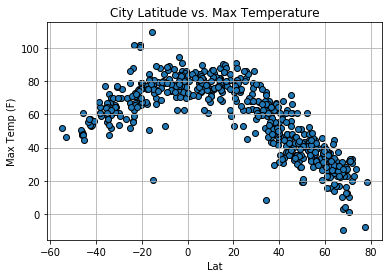

In [30]:
plt.scatter(df["lat"],df["maxtemp"],edgecolors="black")
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temp (F)")
plt.xlabel("Lat")
plt.grid()
plt.savefig("latvstemp")

#### Latitude vs. Humidity Plot

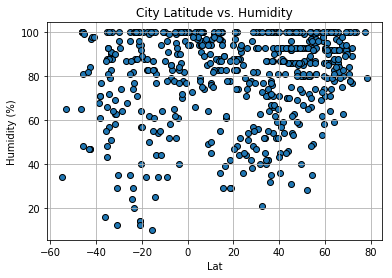

In [31]:
plt.scatter(df["lat"],df["humidity"],edgecolors="black")
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Lat")
plt.grid()
plt.savefig("latvshumidity")

#### Latitude vs. Cloudiness Plot

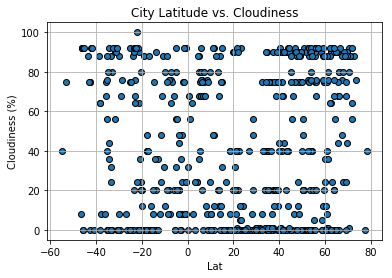

In [32]:
plt.scatter(df["lat"],df["cloudiness"],edgecolors="black")
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Lat")
plt.grid()
plt.savefig("latvsclouds")

#### Latitude vs. Wind Speed Plot

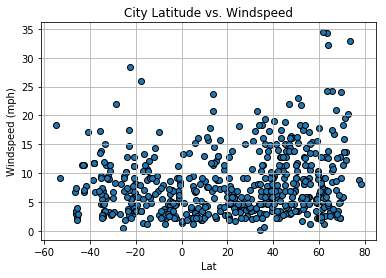

In [33]:
plt.scatter(df["lat"],df["windspeed"],edgecolors="black")
plt.title("City Latitude vs. Windspeed")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Lat")
plt.grid()
plt.savefig("latvswind")